In [1]:
import os
import glob

import pandas as pd
import numpy as np
from pathlib import Path
from ipywidgets import FileUpload

import matplotlib.pyplot as plt

import random
from tqdm.notebook import tqdm
import pydicom # Handle MRI images

import cv2  # OpenCV - https://docs.opencv.org/master/d6/d00/tutorial_py_root.html

from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score


import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import layers


import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout,Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from keras.optimizers import Adam 
from tensorflow.keras.layers.experimental.preprocessing import Rescaling

import tensorflow as tf
from tensorflow.keras import layers
import nilearn as nl
import nibabel as nib
import nilearn.plotting as nlplt

/opt/conda/lib/python3.7/site-packages/nilearn/__init__.py:69: FutureWarning: Python 3.7 support is deprecated and will be removed in release 0.12 of Nilearn. Consider switching to Python 3.9 or 3.10.
  _python_deprecation_warnings()


In [2]:
train_path = '/kaggle/input/miccaibrats2019/MICCAI_BraTS_2019_Data_Training/MICCAI_BraTS_2019_Data_Training'
hgg_path = train_path + '/HGG'
lgg_path = train_path + '/LGG'


flair_images = []
t1_images = []
t1ce_images = []
t2_images = []

In [3]:
def get_mid_image(img):

    image = cv2.split(img)
    mid = len(image)//2
    #print(mid)
    
    img2d = image[mid]
    
   # print(img2d.shape)
    
    return img2d


In [4]:
all_path = []
label = []

In [5]:
import os

all_path = []
label = []

def get_suffled_path(count):
    all_path_with_label = []

    for i, filename in enumerate(os.listdir(hgg_path)):
        temp_path = os.path.join(hgg_path, filename, filename)
        path_with_label = (temp_path, 0)
        all_path_with_label.append(path_with_label)
        
    hgg_len = len(all_path_with_label)
    print(hgg_len)

       # if i == count - 1:
          #  break

    for i, filename in enumerate(os.listdir(lgg_path)):
        temp_path = os.path.join(lgg_path, filename, filename)
        path_with_label = (temp_path, 1)
        all_path_with_label.append(path_with_label)
    print(len(all_path_with_label)- hgg_len)

      #  if i == count - 1:
           # break

    #for i in all_path_with_label:
        #print(i)
        
    random.shuffle(all_path_with_label)
    
        
    all_path = [t[0] for t in all_path_with_label]
    label = [t[1] for t in all_path_with_label]
    
    return (all_path,label)


    #print(all_path)
    #print(label)
      
            
temp = get_suffled_path(50)
all_path = temp[0]
label = temp[1]



259
76


In [6]:
def all_channel_images(all_path):
    
    for _path in all_path:
        
        flair_path = _path+'_flair.nii'
        flair_image3d = nib.load(flair_path).get_fdata()
        flair_image2d = get_mid_image(flair_image3d)
        flair_images.append(flair_image2d)
        
        t1_path = _path+'_t1.nii'
        t1_image3d = nib.load(t1_path).get_fdata()
        t1_image2d = get_mid_image(t1_image3d)
        t1_images.append(t1_image2d)
        
        #t1ce_path = _path+'_t1ce.nii'
        #t1ce_image3d = nib.load(t1ce_path).get_fdata()
        #t1ce_image2d = get_mid_image(t1ce_image3d)
        #t1ce_images.append(t1ce_image2d)
        
        #t2_path = _path+'_t2.nii'
        #t2_image3d = nib.load(t2_path).get_fdata()
        #t2_image2d = get_mid_image(t2_image3d)
        #t2_images.append(t2_image2d)"""
        
        
all_channel_images(all_path)

In [7]:
"""# Create a 10x10 grid of subplots
fig, axes = plt.subplots(nrows=4, ncols=5, figsize=(16, 16))

# Flatten the axes array to simplify indexing
axes = axes.ravel()

# Loop over each image and plot it in a subplot
for i in range(len(flair_images)):
    axes[i].imshow(flair_images[i], cmap='gray')
    axes[i].axis('off')
    axes[i].set_title(label[i])
    
    

# Show the plot
plt.show()"""

"# Create a 10x10 grid of subplots\nfig, axes = plt.subplots(nrows=4, ncols=5, figsize=(16, 16))\n\n# Flatten the axes array to simplify indexing\naxes = axes.ravel()\n\n# Loop over each image and plot it in a subplot\nfor i in range(len(flair_images)):\n    axes[i].imshow(flair_images[i], cmap='gray')\n    axes[i].axis('off')\n    axes[i].set_title(label[i])\n    \n    \n\n# Show the plot\nplt.show()"

# **Model**

In [8]:
def get_model03():
    np.random.seed(0)
    random.seed(12)
    tf.random.set_seed(12)

    inpt = keras.Input(shape=X_train.shape[1:])

    h = tf.keras.layers.experimental.preprocessing.Rescaling(1.0 / 255)(inpt)
    
    h = tf.keras.layers.Conv2D(64, kernel_size=(4, 4), activation="relu", name="Conv_0")(h)
    h = tf.keras.layers.AveragePooling2D(pool_size=(2, 2))(h)
    
    h = tf.keras.layers.Conv2D(128, kernel_size=(4, 4), activation="relu", name="Conv_1")(h)
    h = tf.keras.layers.AveragePooling2D(pool_size=(2, 2))(h)

    h = tf.keras.layers.Conv2D(512, kernel_size=(4, 4), activation="relu", name="Conv_2")(h)
    h = tf.keras.layers.MaxPool2D(pool_size=(2, 2))(h)

    h = tf.keras.layers.Conv2D(1024, kernel_size=(2, 2), activation="relu", name="Conv_3")(h)
    h = tf.keras.layers.MaxPool2D(pool_size=(1, 1))(h)

    h = tf.keras.layers.Dropout(0.1)(h)

    h = tf.keras.layers.Flatten()(h)
    h = tf.keras.layers.Dense(128, activation="relu")(h)

    output = tf.keras.layers.Dense(2, activation="softmax")(h)

    model = tf.keras.Model(inpt, output)

    # https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/schedules/ExponentialDecay
    
    initial_learning_rate =  0.0001
    lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
        initial_learning_rate,
        decay_steps=100000,
        decay_rate=0.96, 
        staircase=True
    )
  
    roc_auc = tf.keras.metrics.AUC(name='roc_auc', curve='ROC')

    model.compile(
        loss="categorical_crossentropy", 
#         loss="binary_crossentropy", 
        
        optimizer=keras.optimizers.Adam(learning_rate=lr_schedule),
       # optimizer=keras.optimizers.Adam(),

        metrics=[roc_auc],
    )
    return model

In [9]:
checkpoint_filepath = "best_model.h5"

model_checkpoint_cb = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=False,
    monitor="val_roc_auc",
    mode="max",
    save_best_only=True,
    save_freq="epoch",
    verbose=1,
)

In [10]:
# early_stopping_cb = tf.keras.callbacks.EarlyStopping(monitor=tf.keras.metrics.AUC(), mode='auto', verbose=1, patience=5)
# early_stopping_cb = tf.keras.callbacks.EarlyStopping(monitor="val_acc", patience=15)
early_stopping_cb = tf.keras.callbacks.EarlyStopping(monitor="val_roc_auc", mode='max', patience=5)

In [11]:
#reshaping

train_image = np.array(flair_images)
train_label = np.array(label)

print(train_image.shape,train_label.shape)

X_train, X_valid, y_train, y_valid= train_test_split(train_image, train_label, test_size=0.2, random_state=42)
print(X_train.shape,y_train.shape)
print(X_train.shape,y_train.shape)


X_train = tf.expand_dims(X_train, axis=-1)
X_valid = tf.expand_dims(X_valid, axis=-1)

print(X_train.shape)
print(X_valid.shape)

print(y_train.shape)
print(y_valid.shape)

(335, 240, 240) (335,)
(268, 240, 240) (268,)
(268, 240, 240) (268,)
(268, 240, 240, 1)
(67, 240, 240, 1)
(268,)
(67,)


In [12]:
print(y_valid)

[0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0
 1 0 1 0 0 0 1 0 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 1 1 0 0 0 1 0]


In [13]:
from tensorflow.keras.utils import to_categorical



y_train = to_categorical(y_train)
y_valid = to_categorical(y_valid)

print(y_train.shape)
print(y_valid.shape)

#y_train = keras.utils.to_categorical(y_train)
#y_valid = keras.utils.to_categorical(y_valid)

#print(y_train.shape)
#print(y_valid.shape)

#print(y_valid)

(268, 2)
(67, 2)


In [14]:
model = get_model03() # LB score 0.5
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 240, 240, 1)]     0         
                                                                 
 rescaling (Rescaling)       (None, 240, 240, 1)       0         
                                                                 
 Conv_0 (Conv2D)             (None, 237, 237, 64)      1088      
                                                                 
 average_pooling2d (AverageP  (None, 118, 118, 64)     0         
 ooling2D)                                                       
                                                                 
 Conv_1 (Conv2D)             (None, 115, 115, 128)     131200    
                                                                 
 average_pooling2d_1 (Averag  (None, 57, 57, 128)      0         
 ePooling2D)                                                 

In [15]:
print(X_train.shape)
print(X_valid.shape)

print(y_train.shape)
print(y_valid.shape)

(268, 240, 240, 1)
(67, 240, 240, 1)
(268, 2)
(67, 2)


In [16]:
# history = model.fit(x=X_train, y = y_train, epochs=20, 
#                     callbacks=[model_checkpoint_cb], 
#                   validation_data=(X_valid, y_valid))
epochs = 10
history = model.fit(x=X_train, y = y_train, epochs=epochs, 
                    #callbacks=[model_checkpoint_cb, early_stopping_cb],
                    validation_data=(X_valid, y_valid))

Epoch 1/10


2024-05-15 17:03:12.515173: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inmodel/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


9/9 [==============================] - 11s 364ms/step - loss: 0.7617 - roc_auc: 0.6511 - val_loss: 0.7042 - val_roc_auc: 0.2976
Epoch 2/10
9/9 [==============================] - 2s 187ms/step - loss: 0.7003 - roc_auc: 0.5818 - val_loss: 0.6838 - val_roc_auc: 0.7534
Epoch 3/10
9/9 [==============================] - 2s 187ms/step - loss: 0.6731 - roc_auc: 0.8184 - val_loss: 0.6502 - val_roc_auc: 0.8098
Epoch 4/10
9/9 [==============================] - 2s 188ms/step - loss: 0.6166 - roc_auc: 0.7964 - val_loss: 0.5272 - val_roc_auc: 0.8187
Epoch 5/10
9/9 [==============================] - 2s 187ms/step - loss: 0.4926 - roc_auc: 0.8423 - val_loss: 0.5220 - val_roc_auc: 0.8178
Epoch 6/10
9/9 [==============================] - 2s 187ms/step - loss: 0.4678 - roc_auc: 0.8596 - val_loss: 0.5105 - val_roc_auc: 0.8173
Epoch 7/10
9/9 [==============================] - 2s 187ms/step - loss: 0.4634 - roc_auc: 0.8643 - val_loss: 0.5147 - val_roc_auc: 0.8182
Epoch 8/10
9/9 [============================

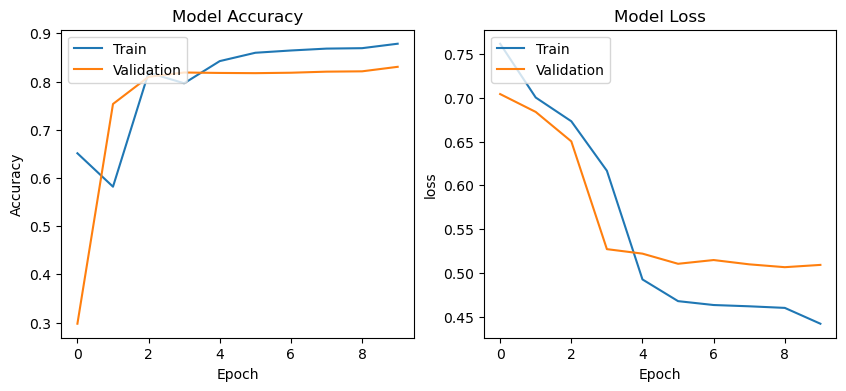

In [17]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2, 2, figsize=(10, 4))

plt.subplot(1, 2, 1)

plt.plot(history.history['roc_auc'])
plt.plot(history.history['val_roc_auc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')


plt.subplot(1, 2, 2)

import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [18]:
from sklearn.metrics import classification_report,confusion_matrix

pred = model.predict(X_valid)

pred = np.argmax(pred,axis=1)

y_test_new = np.argmax(y_valid,axis=1)

print(classification_report(y_test_new,pred))

3/3 [==============================] - 0s 35ms/step
              precision    recall  f1-score   support

           0       0.77      1.00      0.87        51
           1       1.00      0.06      0.12        16

    accuracy                           0.78        67
   macro avg       0.89      0.53      0.49        67
weighted avg       0.83      0.78      0.69        67



# **Fusion Model**

In [19]:
#reshaping

def reshaping(input_images):

    train_image = np.array(input_images)
    train_label = np.array(label)

    #print(train_image.shape,train_label.shape)

    X_train, X_valid, y_train, y_valid= train_test_split(train_image, train_label, test_size=0.2, random_state=42)
   # print(X_train.shape,y_train.shape)
   # print(X_train.shape,y_train.shape)


    X_train = tf.expand_dims(X_train, axis=-1)
    X_valid = tf.expand_dims(X_valid, axis=-1)
    
    return X_train,X_valid,y_train,y_valid

In [20]:
X_train_flair,X_valid_flair,y_train_flair,y_valid_flair = reshaping(flair_images)

print(X_train_flair.shape)
print(X_valid_flair.shape)

print(y_train_flair.shape)
print(y_valid_flair.shape)

X_train_t1,X_valid_t1,y_train_t1,y_valid_t1 = reshaping(t1_images)

print(X_train_t1.shape)
print(X_valid_t1.shape)

print(y_train_t1.shape)
print(y_valid_t1.shape)



print(y_train_flair)

(268, 240, 240, 1)
(67, 240, 240, 1)
(268,)
(67,)
(268, 240, 240, 1)
(67, 240, 240, 1)
(268,)
(67,)
[0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0
 1 0 0 0 0 1 1 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 1 1 1 0 0 0 1 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0
 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 1 1 0 1 1 0 0 0 0 0 0 0 0 1 1 0 0 1 1
 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 1 0 1
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0
 0 0 0 1 0 1 0 1 1]


In [21]:
from tensorflow.keras.utils import to_categorical



y_train = to_categorical(y_train_flair)
y_valid = to_categorical(y_valid_flair)

print(y_train.shape)
print(y_valid.shape)


(268, 2)
(67, 2)


In [22]:
def get_conv_model(input_layer):
    h = tf.keras.layers.experimental.preprocessing.Rescaling(1.0 / 255)(input_layer)

    h = tf.keras.layers.Conv2D(64, kernel_size=(4, 4), activation="relu")(h)
    h = tf.keras.layers.AveragePooling2D(pool_size=(2, 2))(h)

    h = tf.keras.layers.Conv2D(128, kernel_size=(4, 4), activation="relu")(h)
    h = tf.keras.layers.AveragePooling2D(pool_size=(2, 2))(h)

    h = tf.keras.layers.Conv2D(512, kernel_size=(4, 4), activation="relu")(h)
    h = tf.keras.layers.MaxPool2D(pool_size=(2, 2))(h)

    h = tf.keras.layers.Conv2D(1024, kernel_size=(2, 2), activation="relu")(h)
    h = tf.keras.layers.MaxPool2D(pool_size=(1, 1))(h)

    h = tf.keras.layers.Dropout(0.1)(h)

    h = tf.keras.layers.Flatten()(h)
    return h


In [23]:
input_1 = keras.Input(shape=X_train_flair.shape[1:])
h1 = get_conv_model(input_1)

input_2 = keras.Input(shape=X_train_t1.shape[1:])
h2 = get_conv_model(input_2)

h_concat = tf.keras.layers.Concatenate()([h1, h2])

h_concat = tf.keras.layers.Dense(128, activation="relu")(h_concat)

output = tf.keras.layers.Dense(2, activation="softmax")(h_concat)

model = tf.keras.Model(inputs=[input_1, input_2], outputs=output)


In [24]:
initial_learning_rate =  0.0001
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
        initial_learning_rate,
        decay_steps=100000,
        decay_rate=0.96, 
        staircase=True
    )
  
roc_auc = tf.keras.metrics.AUC(name='roc_auc', curve='ROC')

model.compile(
        loss="categorical_crossentropy", 
#         loss="binary_crossentropy", 
        
        optimizer=keras.optimizers.Adam(learning_rate=lr_schedule),
       # optimizer=keras.optimizers.Adam(),

        metrics=[roc_auc],
    )

In [25]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 240, 240, 1  0           []                               
                                )]                                                                
                                                                                                  
 input_3 (InputLayer)           [(None, 240, 240, 1  0           []                               
                                )]                                                                
                                                                                                  
 rescaling_1 (Rescaling)        (None, 240, 240, 1)  0           ['input_2[0][0]']                
                                                                                            

In [26]:
epochs = 10
"""history = model.fit(x=X_train, y = y_train, epochs=epochs, 
                    #callbacks=[model_checkpoint_cb, early_stopping_cb],
                    validation_data=(X_valid, y_valid))"""

history = model.fit(
    [X_train_flair, X_train_t1],  # Pass in both inputs
    y_train,
    batch_size=32,
    epochs=10,
    validation_data=([X_valid_flair, X_valid_t1], y_valid),
)

Epoch 1/10


2024-05-15 17:03:40.860380: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inmodel_1/dropout_1/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


9/9 [==============================] - 5s 406ms/step - loss: 0.9373 - roc_auc: 0.5799 - val_loss: 0.6400 - val_roc_auc: 0.7572
Epoch 2/10
9/9 [==============================] - 3s 363ms/step - loss: 0.6372 - roc_auc: 0.7922 - val_loss: 0.5817 - val_roc_auc: 0.8184
Epoch 3/10
9/9 [==============================] - 3s 363ms/step - loss: 0.5263 - roc_auc: 0.8062 - val_loss: 0.5313 - val_roc_auc: 0.8441
Epoch 4/10
9/9 [==============================] - 3s 363ms/step - loss: 0.5170 - roc_auc: 0.8228 - val_loss: 0.5338 - val_roc_auc: 0.8619
Epoch 5/10
9/9 [==============================] - 3s 361ms/step - loss: 0.4823 - roc_auc: 0.8520 - val_loss: 0.4982 - val_roc_auc: 0.8407
Epoch 6/10
9/9 [==============================] - 3s 363ms/step - loss: 0.4479 - roc_auc: 0.8851 - val_loss: 0.4879 - val_roc_auc: 0.8407
Epoch 7/10
9/9 [==============================] - 3s 363ms/step - loss: 0.4302 - roc_auc: 0.8883 - val_loss: 0.4800 - val_roc_auc: 0.8463
Epoch 8/10
9/9 [=============================

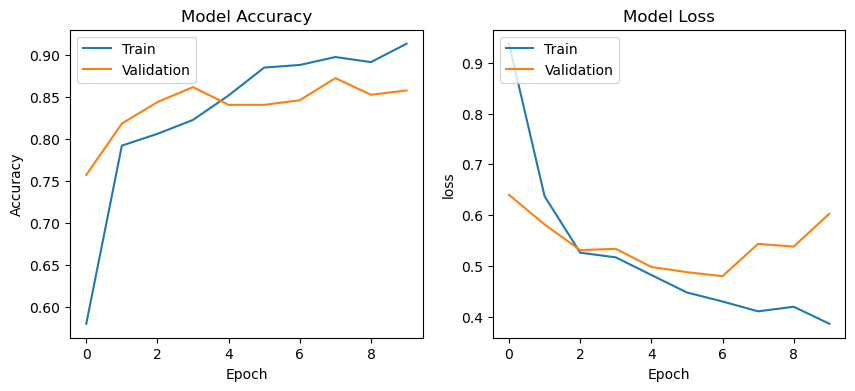

In [27]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2, 2, figsize=(10, 4))

plt.subplot(1, 2, 1)

plt.plot(history.history['roc_auc'])
plt.plot(history.history['val_roc_auc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')


plt.subplot(1, 2, 2)

import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [28]:
from sklearn.metrics import classification_report,confusion_matrix

pred = model.predict([X_valid_flair,X_valid_t1])

pred = np.argmax(pred,axis=1)

y_test_new = np.argmax(y_valid,axis=1)

print(classification_report(y_test_new,pred))

3/3 [==============================] - 0s 64ms/step
              precision    recall  f1-score   support

           0       0.76      1.00      0.86        51
           1       0.00      0.00      0.00        16

    accuracy                           0.76        67
   macro avg       0.38      0.50      0.43        67
weighted avg       0.58      0.76      0.66        67



/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
